<a href="https://colab.research.google.com/github/shikhar23091999/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Shikhar_Satpute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [3]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the csv
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Project/Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Copy the dataset
df_copy = df.copy()
df_copy.shape

(119390, 32)

In [6]:
# Finding the missing or null values
df_copy.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [7]:
# Replacing the agent and company value with 0
df_copy[['agent','company']]=df_copy[['agent','company']].fillna(0.0)

In [8]:
# Children should be rounded off
df_copy['children'].fillna(df_copy.children.mean(),inplace=True)

In [9]:
# Country should be replaced with mode
df_copy['country'].fillna(df_copy.mode().to_string(),inplace=True)

In [10]:
# Zero null values
df_copy.isnull().sum().sort_values(ascending = False)

reservation_status_date           0
reservation_status                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

In [11]:
# Removing the rows which has 0 guests
df_copy=df_copy.drop(df_copy[(df_copy['adults'] == 0) & (df_copy['babies'] == 0) & (df_copy['children'] == 0)].index)

In [12]:
df_copy.shape

(119210, 32)

In [13]:
# checking the datatype
df_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [14]:
# converting the float to int
df_copy[['agent','company','children']] = df_copy[['agent','company','children']].astype('int64')

In [15]:
df_copy=df_copy.drop_duplicates()

In [16]:
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

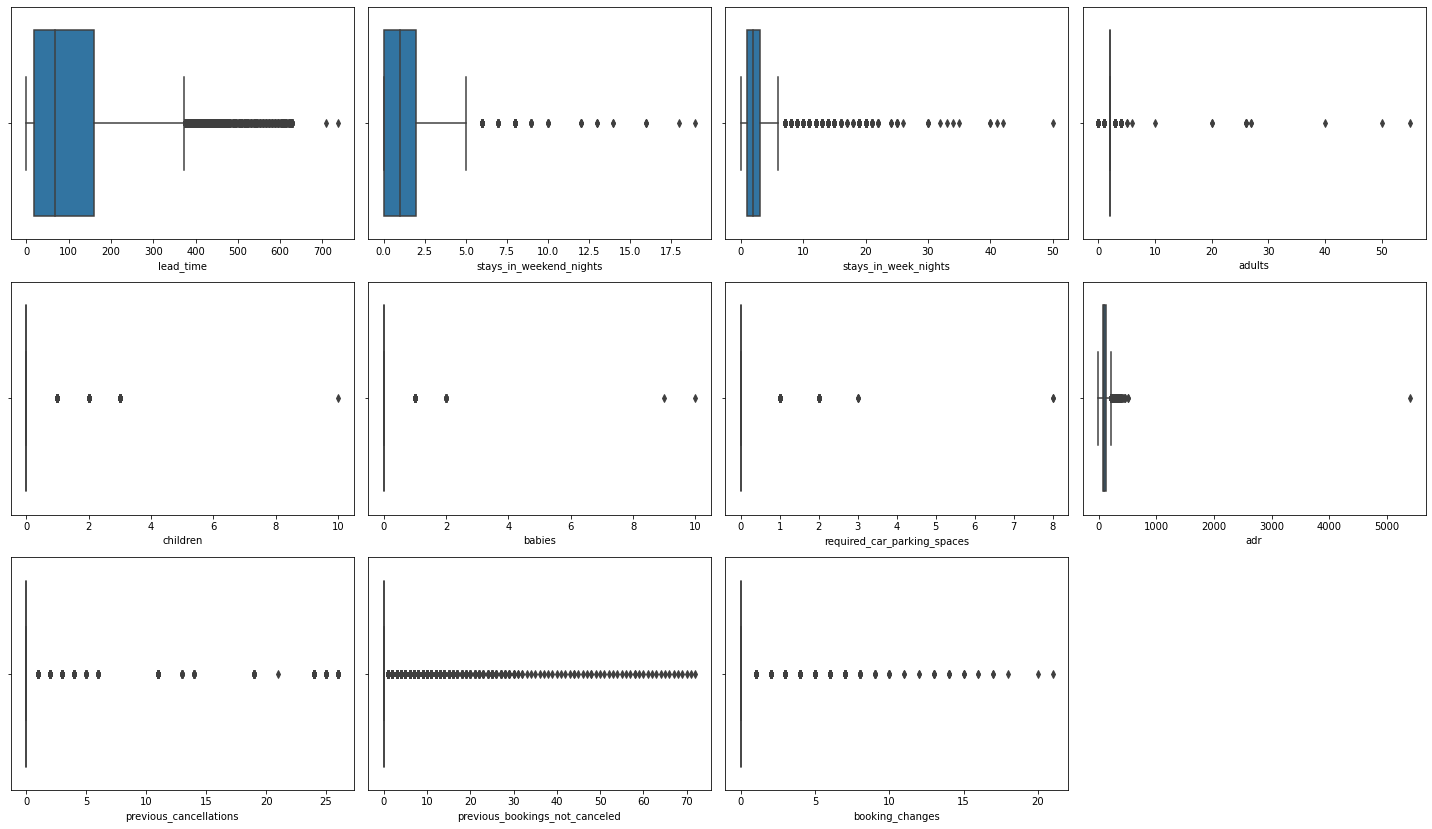

In [17]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for x in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[x])
  plt.tight_layout()

In [18]:
df_copy.loc[df_copy.lead_time > 500, 'lead_time'] = 500
df_copy.loc[df_copy.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df_copy.loc[df_copy.adults > 4, 'adults'] = 4
df_copy.loc[df_copy.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df_copy.loc[df_copy.previous_cancellations > 0, 'previous_cancellations'] = 1
df_copy.loc[df_copy.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df_copy.loc[df_copy.booking_changes > 5, 'booking_changes'] = 5
df_copy.loc[df_copy.babies > 8, 'babies'] = 0
df_copy.loc[df_copy.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df_copy.loc[df_copy.children > 8, 'children'] = 0
df_copy.loc[df_copy.adr > 1000, 'adr'] = 1000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'City hotel vs Resort hotel')

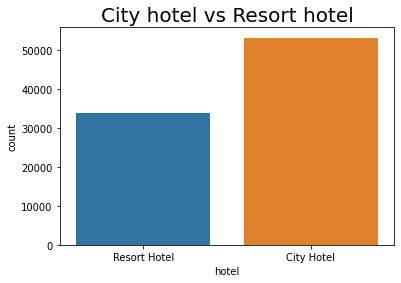

In [19]:
# City hotel vs Resort hotel booking count
sns.countplot(df_copy['hotel']).set_title("City hotel vs Resort hotel",fontsize = 20)

([<matplotlib.patches.Wedge at 0x7f4978e11490>,
 [Text(-1.0341113192017586, -0.37498503903329095, 'City Hotel'),
  Text(1.1281214774295134, 0.4090744824139636, 'Resort Hotel')],
 [Text(-0.5640607195645955, -0.20453729401815868, '61.1%'),
  Text(0.6580708618338827, 0.23862678140814542, '38.9%')])

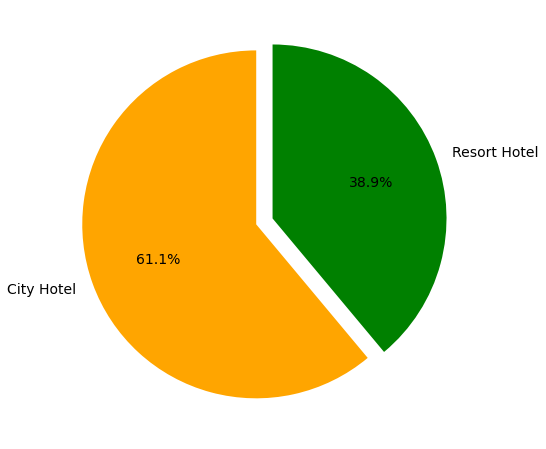

In [86]:
# City hotel vs Resort hotel booking percentage
plt.rcParams['figure.figsize'] = 8,8
labels = df_copy['hotel'].value_counts().index
sizes = df_copy['hotel'].value_counts()
explode = (0, 0.1)
colors = ['Orange','Green']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Text(0.5, 1.0, 'Yearly Comparison')

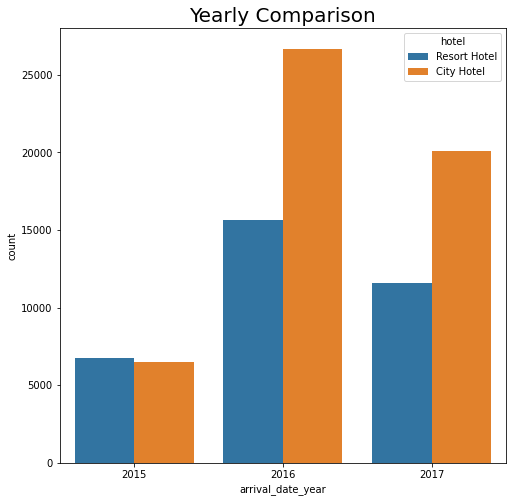

In [21]:
# Yearly comparison of booking 
sns.countplot(data = df_copy, x = 'arrival_date_year', hue = 'hotel').set_title("Yearly Comparison", fontsize = 20)

Text(0.5, 1.0, 'Monthly Comparison')

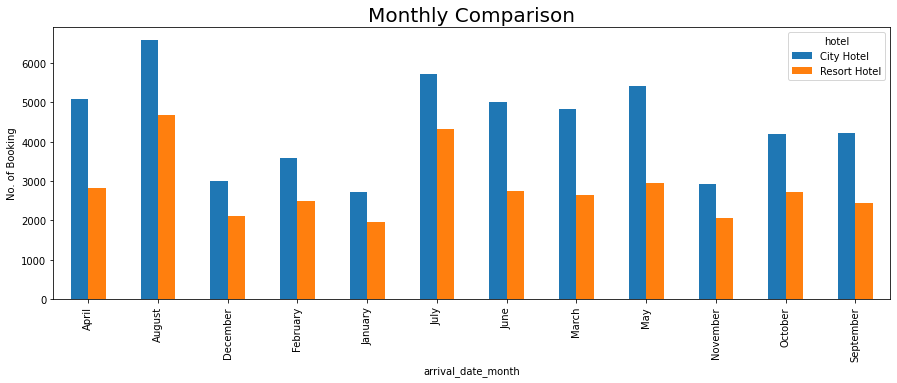

In [22]:
# Montly comparison of booking
ax1= df_copy.groupby(['arrival_date_month','hotel']).size()
ax1 = ax1.unstack()
ax1 = ax1.plot.bar(figsize=(15,5))
ax1.set_ylabel('No. of Booking')
ax1.set_title("Monthly Comparison",fontsize=20)

Text(0.5, 1.0, 'Date-Wise Comparison')

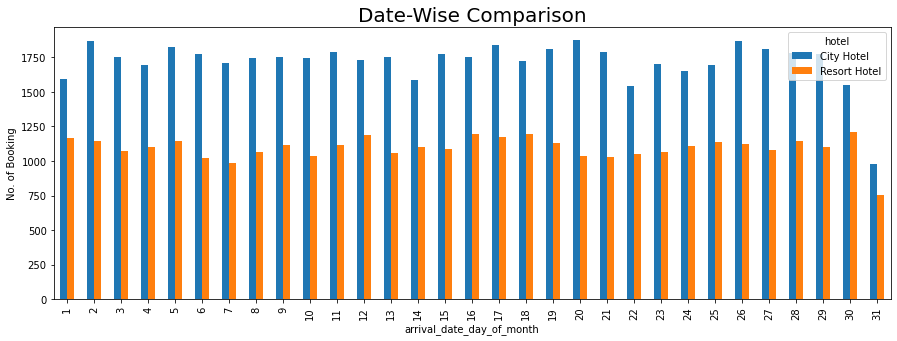

In [23]:
# Date wise comparison
ax2= df_copy.groupby(['arrival_date_day_of_month','hotel']).size()
ax2 = ax2.unstack()
ax2 = ax2.plot.bar(figsize=(15,5))
ax2.set_ylabel('No. of Booking')
ax2.set_title("Date-Wise Comparison",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Resevered Room (Booking)')

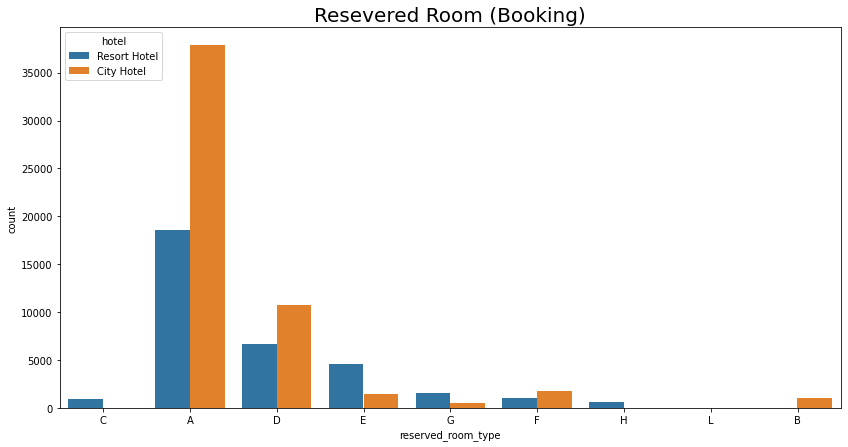

In [24]:
# Resevered Rooms while booking
plt.figure(figsize=(14,7))
sns.countplot(df_copy['reserved_room_type'],hue=df_copy.hotel).set_title("Resevered Room (Booking)", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Assigned Room (Check-in)')

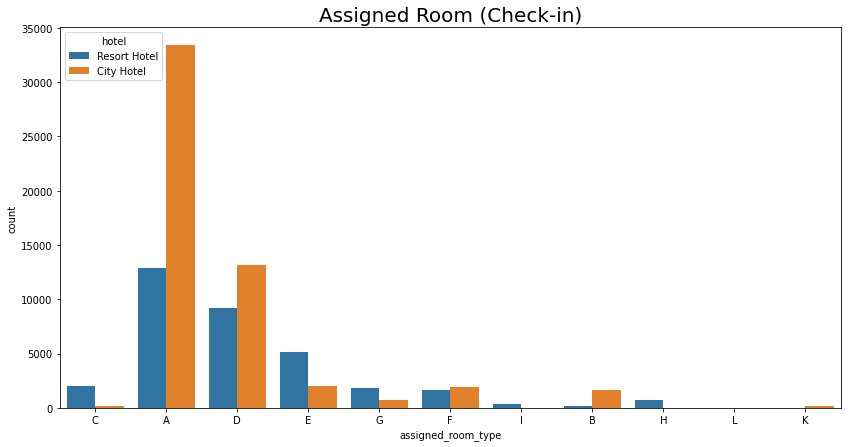

In [25]:
# Rooms assigned during the checkin
plt.figure(figsize=(14,7))
sns.countplot(df_copy['assigned_room_type'],hue=df_copy.hotel).set_title("Assigned Room (Check-in)", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "Change's in the booking")

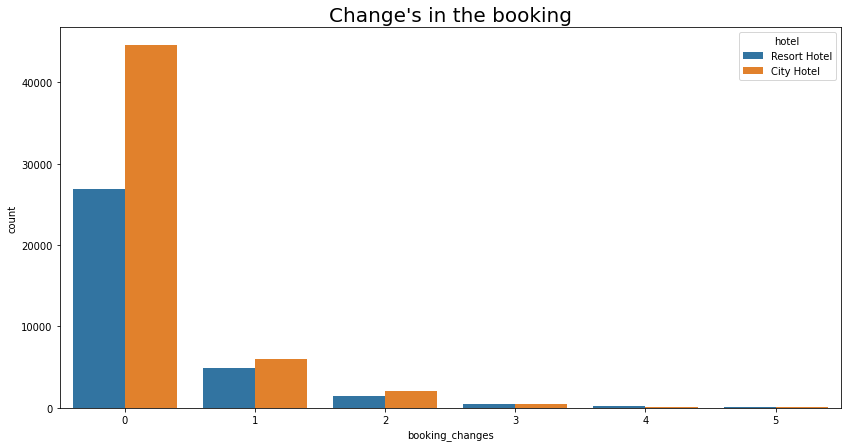

In [26]:
# Booking changes 
plt.figure(figsize=(14,7))
sns.countplot(df_copy['booking_changes'],hue=df_copy.hotel).set_title("Change's in the booking", fontsize = 20)

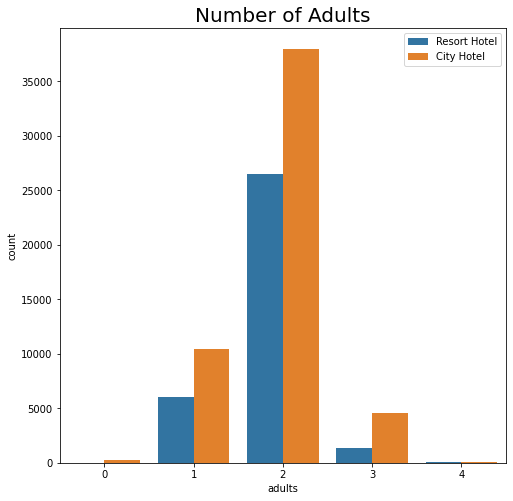

In [27]:
# No. of adults
sns.countplot(data = df_copy, x = 'adults', hue = 'hotel').set_title("Number of Adults", fontsize = 20)
plt.legend(loc='upper right')

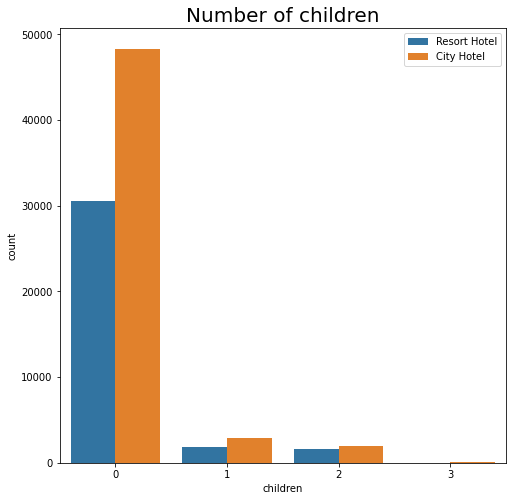

In [28]:
sns.countplot(data = df_copy, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)
plt.legend(loc='upper right')

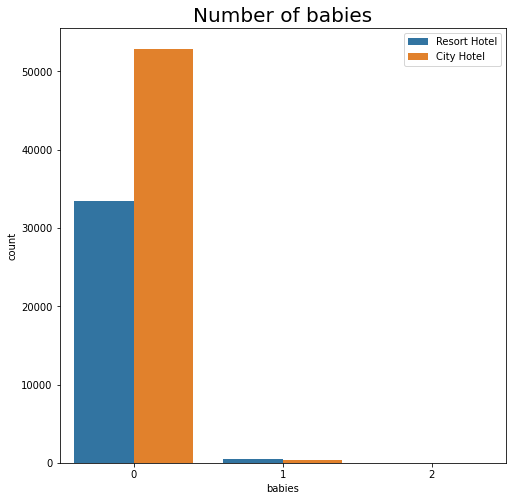

In [29]:
sns.countplot(data = df_copy, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)
plt.legend(loc='upper right')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Members')

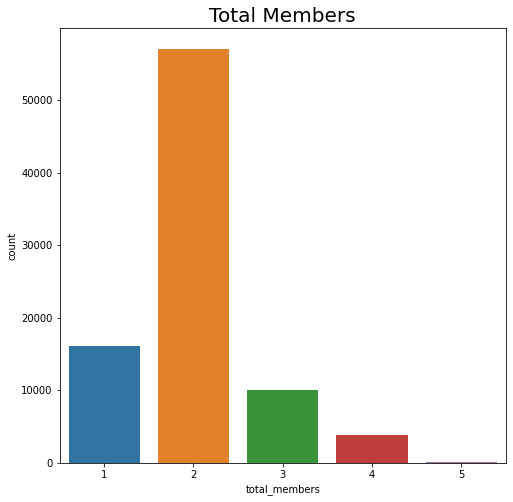

In [30]:
df_copy['total_members'] = df_copy.adults + df_copy.babies + df_copy.children
sns.countplot(df_copy.total_members).set_title('Total Members',fontsize=20)

Text(0.5, 1.0, 'Type of guest')

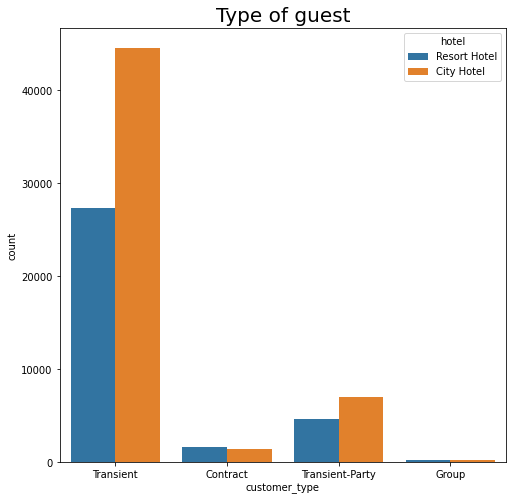

In [31]:
# Type of guest
sns.countplot(data = df_copy, x = 'customer_type',hue=df_copy.hotel).set_title('Type of guest', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Meals Booked')

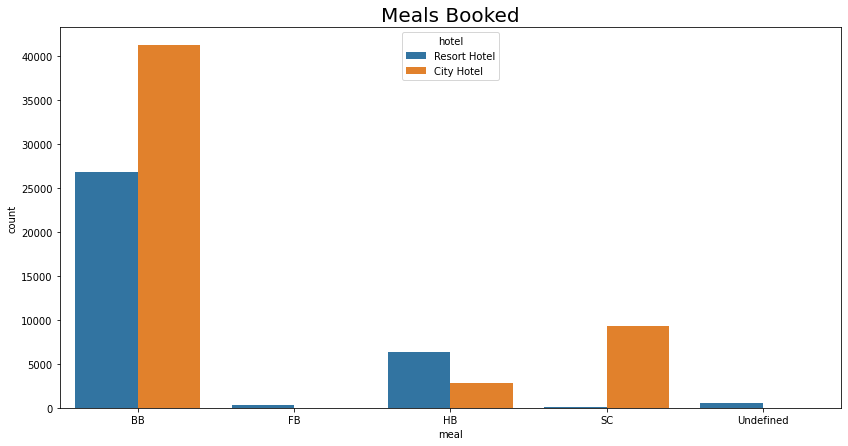

In [32]:
#Meals Booked 
# Undefined/SC — no meal package;
# BB — Bed & Breakfast;
# HB — Half board (breakfast and one other meal — usually dinner);
# FB — Full board (breakfast, lunch and dinner)
plt.figure(figsize=(14,7))
sns.countplot(df_copy['meal'],hue=df_copy.hotel).set_title("Meals Booked", fontsize = 20)

Text(0.5, 1.0, 'Types of Market Segment')

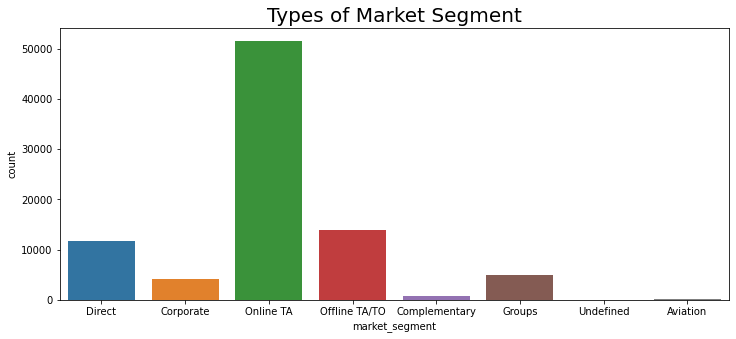

In [33]:
# Types of Market Segment
plt.figure(figsize=(12,5))
sns.countplot(data = df_copy, x = 'market_segment').set_title('Types of Market Segment', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Market Segment')

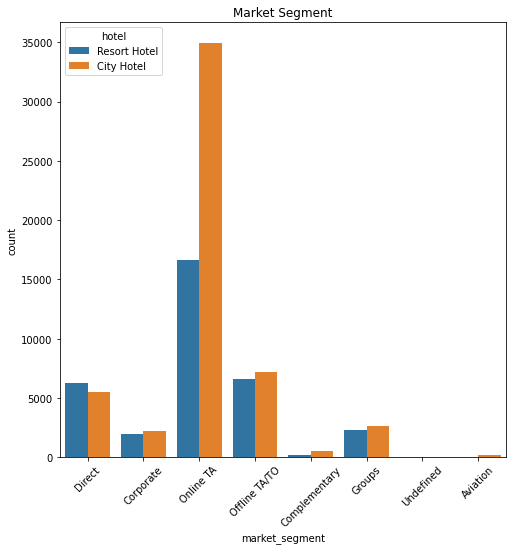

In [34]:
plt.xticks(rotation=45)
# plt.legend(loc='upper right')
sns.countplot(df_copy['market_segment'],hue=df_copy.hotel).set_title("Market Segment")

Text(0.5, 1.0, 'Types of distribution channel')

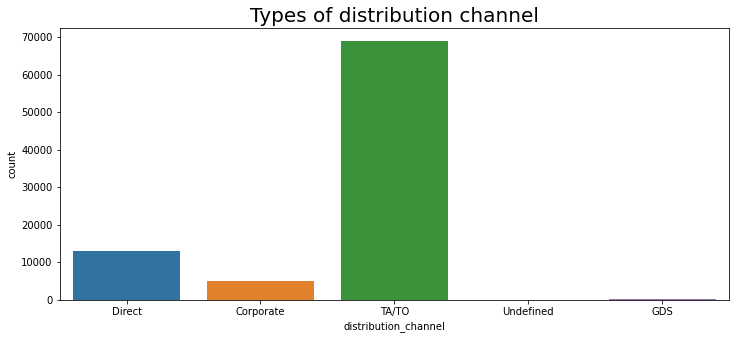

In [35]:
# Type of distribution_channel
plt.figure(figsize=(12,5))
sns.countplot(data = df_copy, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hotel-Wise distribution_channel')

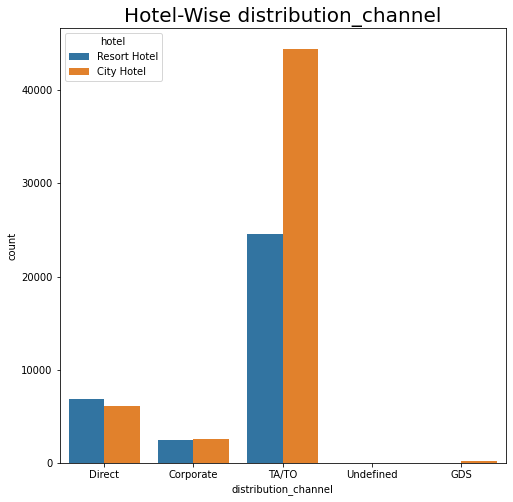

In [36]:
# Hotel-Wise distribution_channel
sns.countplot(df_copy['distribution_channel'],hue=df_copy.hotel).set_title("Hotel-Wise distribution_channel",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hotel-Wise Repeated Guest')

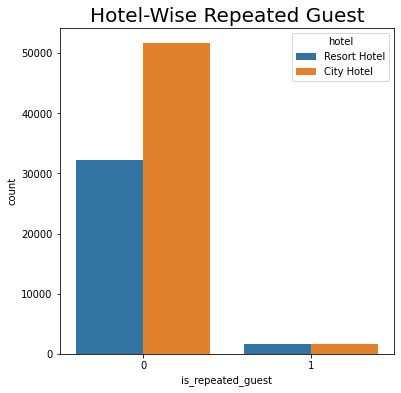

In [37]:
# Hotel-Wise Repeated Guest
plt.figure(figsize=(6,6))
sns.countplot(df_copy['is_repeated_guest'],hue=df_copy.hotel).set_title("Hotel-Wise Repeated Guest",fontsize=20)

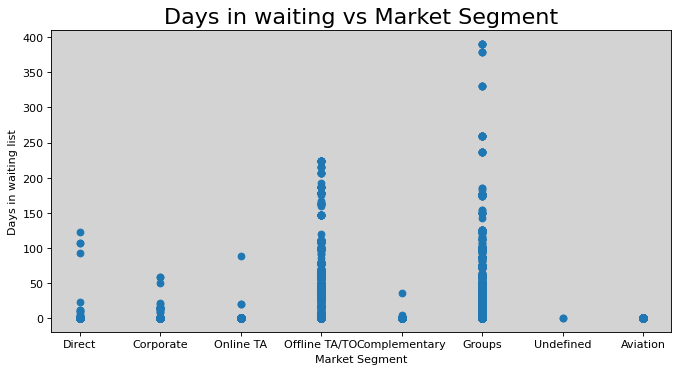

In [38]:
fig,ax3 =plt.subplots(figsize=(10,5), dpi=80)
ax3.scatter(df_copy['market_segment'],df_copy['days_in_waiting_list'])
ax3.set_xlabel("Market Segment")
ax3.set_ylabel("Days in waiting list")
ax3.set_title("Days in waiting vs Market Segment",fontsize=20)
ax3.set_facecolor("lightgrey")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


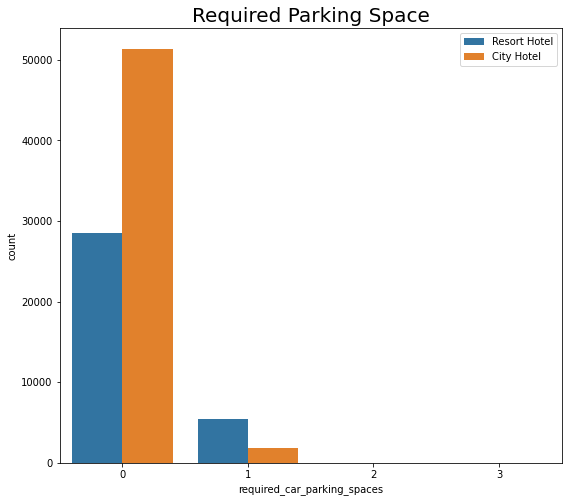

In [39]:
plt.figure(figsize=(9,8))
sns.countplot(df_copy['required_car_parking_spaces'],hue=df_copy.hotel).set_title("Required Parking Space",fontsize=20).set_style("normal")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Heatmap of Arrival Month')

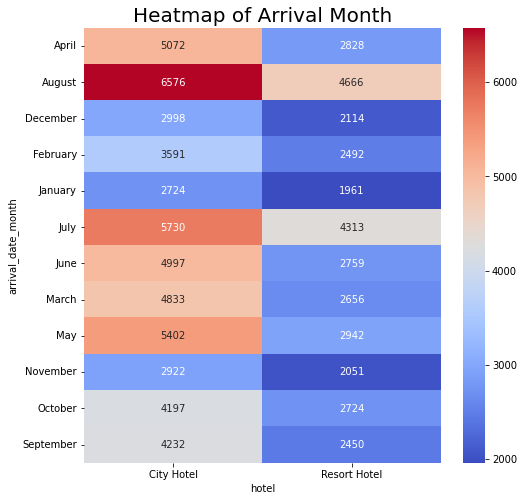

In [40]:
sns.heatmap(pd.crosstab(df_copy.arrival_date_month,df_copy.hotel),cmap='coolwarm',annot=True,fmt=".0f").set_title("Heatmap of Arrival Month",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


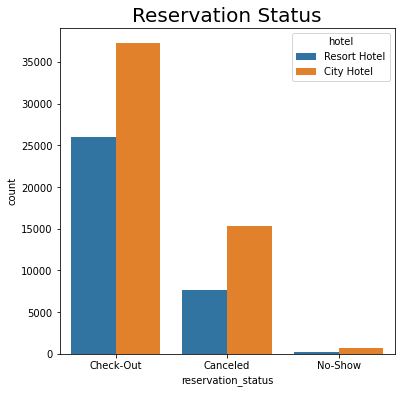

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(df_copy['reservation_status'],hue=df_copy.hotel).set_title("Reservation Status",fontsize =20 ).set_style('normal')

Text(0.5, 1.0, 'Cancellation')

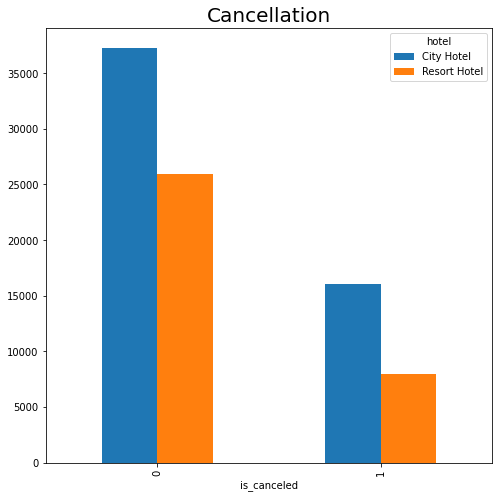

In [42]:
ax4= df_copy.groupby(['is_canceled','hotel']).size()
ax4 = ax4.unstack()
ax4=ax4.plot.bar()
ax4.set_title("Cancellation",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Deposit Type')

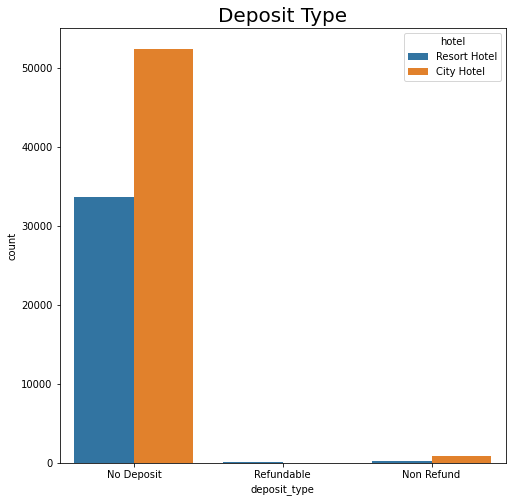

In [43]:
sns.countplot(df_copy['deposit_type'],hue=df_copy.hotel).set_title("Deposit Type",fontsize= 20)

In [44]:
ax4 = pd.DataFrame(data = {'total_of_special_requests': df_copy['total_of_special_requests'],'babies': df_copy['babies'],'children':df_copy['children'],'adults':df_copy['adults']})
ax4.corr()[1:]

,total_of_special_requests,babies,children,adults
babies,0.103940,1.000000,0.019668,0.024028
children,0.044531,0.019668,1.000000,0.029586
adults,0.144755,0.024028,0.029586,1.000000


Text(0.5, 1.0, 'Total Special Request (heatmap)')

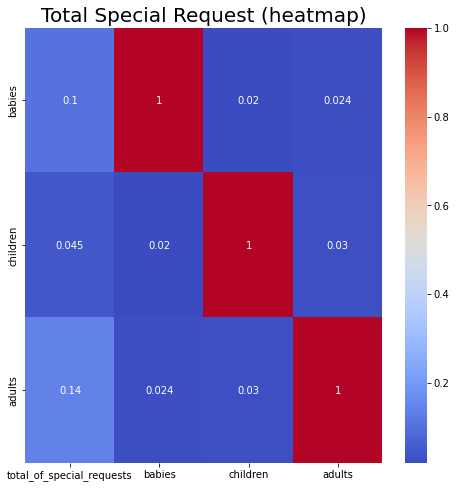

In [45]:
# Total Special Request (heatmap)
sns.heatmap(ax4.corr()[1:],cmap='coolwarm',annot=True).set_title("Total Special Request (heatmap)",fontsize = 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

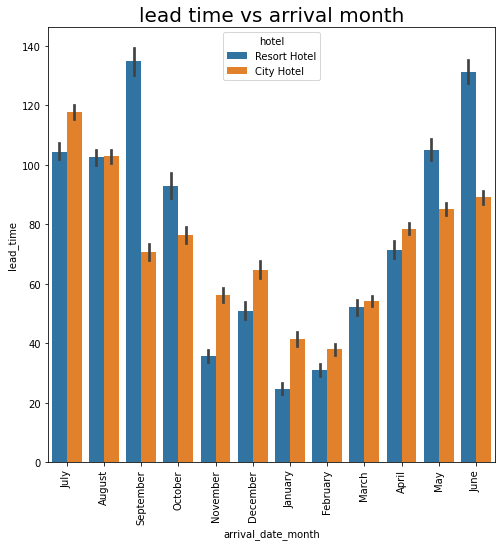

In [46]:
sns.barplot(data = df_copy, x = 'arrival_date_month', y = 'lead_time', hue = 'hotel').set_title("lead time vs arrival month",fontsize =20)
plt.xticks(rotation=90)

In [47]:
df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_members'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stay in Week Days')

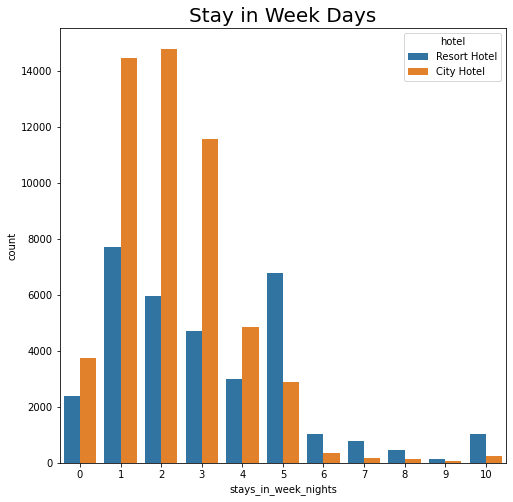

In [48]:
sns.countplot(df_copy.stays_in_week_nights,hue=df_copy.hotel).set_title("Stay in Week Days",fontsize =20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stay in Weekends Days')

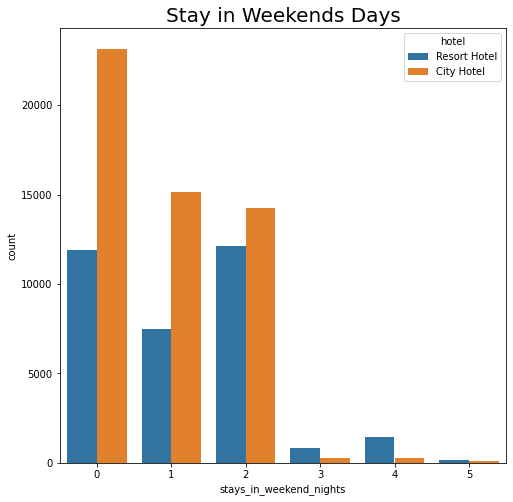

In [49]:
sns.countplot(df_copy.stays_in_weekend_nights,hue=df_copy.hotel).set_title("Stay in Weekends Days",fontsize =20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

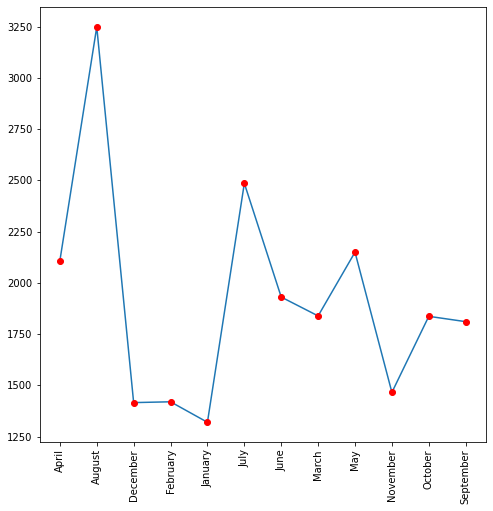

In [50]:
ax6 = df_copy.groupby(['arrival_date_month'])['booking_changes'].sum()
plt.plot(ax6)
plt.plot(ax6,'ro')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

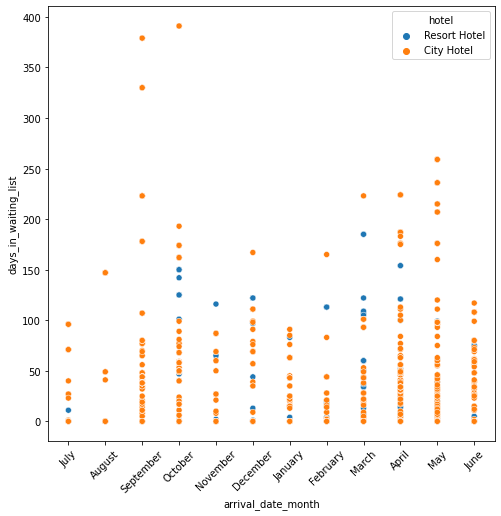

In [51]:
# waiting as per month 
# plt.figure(figsize=(15,10)
sns.scatterplot(data = df_copy ,x = df_copy.arrival_date_month,y=df_copy.days_in_waiting_list, hue=df_copy.hotel)
plt.xticks(rotation=45)

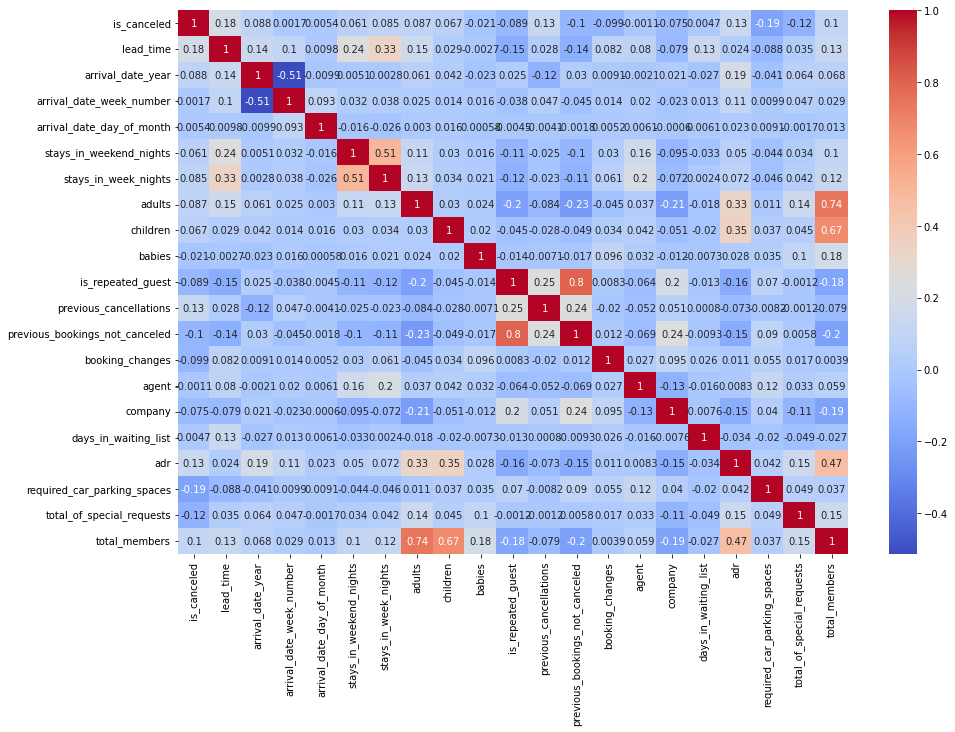

In [52]:
# Correaltion btw whole data
ax7 = df_copy.corr()
plt.figure(figsize=(15,10))
sns.heatmap(ax7,cmap='coolwarm',annot=True)

In [73]:
resort_per_mnth = df_copy.loc[df_copy['hotel']== "Resort Hotel"].groupby(['arrival_date_month'])['hotel'].count()
print(resort_per_mnth)

arrival_date_month
April        2828
August       4666
December     2114
February     2492
January      1961
July         4313
June         2759
March        2656
May          2942
November     2051
October      2724
September    2450
Name: hotel, dtype: int64


In [74]:
city_per_mnth = df_copy.loc[df_copy['hotel']== "City Hotel"].groupby(['arrival_date_month'])['hotel'].count()
print(city_per_mnth)

arrival_date_month
April        5072
August       6576
December     2998
February     3591
January      2724
July         5730
June         4997
March        4833
May          5402
November     2922
October      4197
September    4232
Name: hotel, dtype: int64


In [75]:
resort_canceled =df_copy[df_copy['hotel']=="Resort Hotel"]['is_canceled'].sum()
print(resort_canceled)

7974


In [76]:
city_canceled = df_copy[df_copy['hotel']=="City Hotel"]['is_canceled'].sum()
print(city_canceled)

16035


In [77]:
total_canceled = df_copy['is_canceled'].sum()
print(total_canceled)

24009


In [78]:
resort_canceled_per = round(resort_canceled / df_copy[df_copy['hotel']=="Resort Hotel"].shape[0] *100,2)
print(f"The cancellation rate of Resort Hotel is {resort_canceled_per}%")

The cancellation rate of Resort Hotel is 23.48%


In [79]:
city_canceled_per = round(city_canceled / df_copy[df_copy['hotel']=="City Hotel"].shape[0] * 100,2)
print(f"The cancellation rate of City Hotel is {city_canceled_per}%")

The cancellation rate of City Hotel is 30.1%


In [60]:
total_canceled_per = round(total_canceled / df_copy.shape[0] * 100,2)
print(f"The cancellation rate of both Hotels is {total_canceled_per}%")

The cancellation rate of both Hotels is 27.52%


Text(0.5, 1.0, 'Average Daily Rate (ADR)')

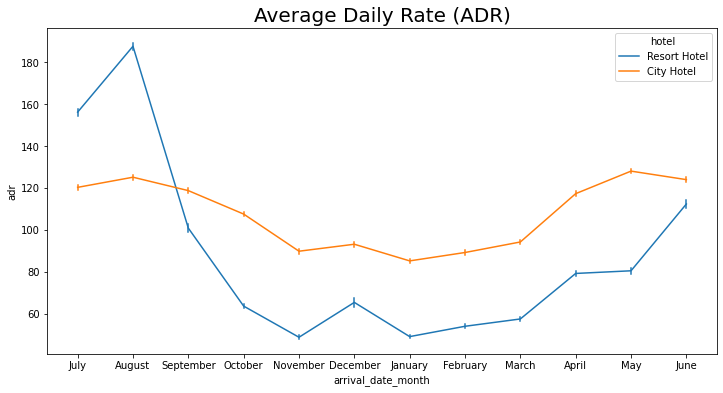

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_copy,err_style='bars').set_title("Average Daily Rate (ADR)",fontsize= 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Monthly Price')

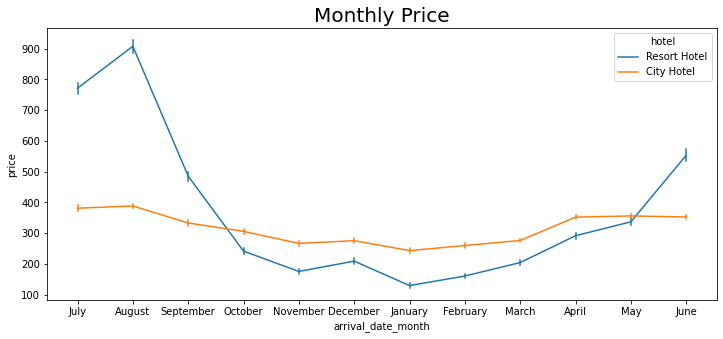

In [63]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df_copy['adr_pp'] = df_copy['adr'] / (df_copy['adults'] + df_copy['children'] + df_copy['babies']) 
actual_guests = df_copy.loc[df_copy["is_canceled"] == 0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel',err_style='bars').set_title("Monthly Price",fontsize=20)

In [81]:
country_visitors = df_copy[df_copy['is_canceled'] == 0].groupby(['country']).size().reset_index(name = 'count')
px.choropleth(country_visitors,locations = "country",color= "count",hover_name= "country",color_continuous_scale=px.colors.sequential.Plasma)

In [65]:
# # Question and Answers
# Which are the five most common countries of origin?
# Which are the months of highest and least occupation? 
# What is the most popular meal package? 
# Which is the most reserved room type?
# How many bookings changes have been done during the studied period?
# How many people have been registered in the hotel?
# What is the most common customer type?

In [66]:
# Answer1 
df_copy.country.value_counts().head(5)

PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
Name: country, dtype: int64

In [67]:
# Answer 2
df_copy.arrival_date_month.value_counts()/100

August       112.42
July         100.43
May           83.44
April         79.00
June          77.56
March         74.89
October       69.21
September     66.82
February      60.83
December      51.12
November      49.73
January       46.85
Name: arrival_date_month, dtype: float64

In [68]:
# Answer 3
df_copy.meal.value_counts(normalize=True)*100

BB           77.848217
SC           10.765792
HB           10.409263
Undefined     0.564026
FB            0.412702
Name: meal, dtype: float64

In [69]:
# Answer 4 
df_copy.reserved_room_type.value_counts(normalize=True)*100

A    64.697925
D    19.919752
E     6.919638
F     3.232833
G     2.350109
B     1.141809
C     1.047805
H     0.683251
L     0.006878
Name: reserved_room_type, dtype: float64

In [70]:
# Answer 5
df_copy.booking_changes.sum()

23033

In [71]:
# Answer 6
df_copy.total_members.sum()

176639

In [72]:
# Answer 7
df_copy.customer_type.value_counts(normalize=True)*100

Transient          82.382208
Transient-Party    13.403646
Contract            3.593947
Group               0.620199
Name: customer_type, dtype: float64